$13^{th}$ Aug 2021

In [1]:
import pandas as pd
import os, glob
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [134]:
dt = datetime.today().strftime(format='%d-%m-%Y')

In [135]:
def replace_with_who_lin(x):
    if x == 'B.1.1.7':
        return x.replace(x, 'B.1.1.7(Alpha)')
    if x == 'B.1.617.2':
        return x.replace(x, 'B.1.617.2(Delta)')
    if x == 'B.1.351':
        return x.replace(x, 'B.1.351(Beta)')
    if x == 'B.1.525':
        return x.replace(x, 'B.1.525(Eta)')
    return x
    

In [136]:
'sequence_name', 'clade', 'lineage', 'genome_coverage'


('sequence_name', 'clade', 'lineage', 'genome_coverage')

In [137]:
df_seq_summ = pd.read_excel('/home/douso/SarsGenomics/QCstats.Analysis_OUSO_17-08-2021.xlsx', 
                   sheet_name='summary')#usecols=['sequence_name', 'clade', 'lineage', 'genome_coverage'], 

In [138]:
df_seq_summ.head()

,sequence_name,clade,lineage,genome_coverage,run_num,seq_dt
0,COVC11310,20C,B.1,59.3,Run1,09-02-2021
1,COVC00854,20C,B.1,94.9,Run7,18-05-2021
2,COVC00867,20C,B.1.446,68.2,Run7,18-05-2021
3,COVC00893,20C,B.1.446,84.1,Run7,18-05-2021
4,COVC00915,NaN,Failed,0.0,Run7,18-05-2021


In [139]:
voc_list = ['B.1.1.7', 'B.1.351', 'P.1', 'B.1.617.2', 'A23.1', 'B.1.525']

In [140]:
df_seq_summ['lineage'].unique()

array(['B.1', 'B.1.446', 'Failed', 'Unkown', 'B.1.1', 'B.1.1.406',
       'B.1.605', 'A', 'B.1.349', 'B.1.336', 'B.1.1.54', 'B.1.276',
       'B.1.361', 'B.1.549', 'A.25', 'B.1.153', 'B.1.530', 'B.1.103',
       'B.1.390', 'B.1.302', 'B.1.333', 'A.23', 'B.1.535', 'B.1.214',
       'B.1.160', 'B.1.378', 'B.1.433', 'B.1.596.1', 'B.1.596', 'B.1.551',
       'B.1.324', 'B.1.520', 'B.1.612', 'B.1.1.171', 'B.1.343',
       'B.1.1.70', 'B.1.404', 'B.1.143', 'B', 'B.1.1.7', 'B.1.351',
       'B.1.525', 'A.23.1', 'B.1.617.2', 'B.1.429', 'B.1.411', 'B.1.527',
       'B.1.393', 'B.1.1.1', 'B.1.540', 'B.1.524', 'B.1.405', 'B.1.577',
       'B.1.1.318', 'AY.4', 'AY.12'], dtype=object)

In [141]:
df_voc = df_seq_summ[df_seq_summ['lineage'].isin(voc_list)]

In [142]:
df_voc_grp_lin = df_voc.groupby('lineage', dropna=False)['sequence_name'].count()

In [143]:
plt.rcParams['axes.titlesize'][:]

'large'

In [144]:
fontdict = {'fontsize': 14,
        'fontweight': 'bold',
        'color': 'k',
        'horizontalalignment': 'center'}

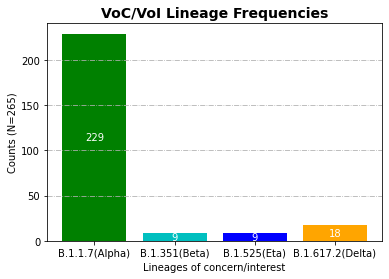

In [211]:
fig,ax = plt.subplots()
y = df_voc_grp_lin
yy = map(replace_with_who_lin, list(y.index))
y.index = yy

n = sum(y)
g = plt.bar(y.index, y, color=['g', 'c', 'b', 'orange'])
ax.bar_label(g, label_type='center', labels=list(y), color='w')
plt.ylabel(f'Counts (N={n})')
plt.xlabel('Lineages of concern/interest')
plt.grid('major', axis='y', ls='-.')
plt.title('VoC/VoI Lineage Frequencies', fontdict)
# fig.savefig(f'/home/douso/SarsGenomics/Processed/report-voci_{dt}.png')
plt.show()

In [ ]:
def assign_seq_platform(x):
    x = str(x)
    if 'ONT' in x: 
        return x.replace(x, 'ONT')
    elif '_NS' in x:
        return x.replace(x, 'NextSeq')
    return x.replace(x, 'MiSeq')

In [146]:
covv_seq_tech = (df_seq_summ.assign(covv_seq_tech=df_seq_summ['run_num'].
                apply(lambda x: assing_seq_platform(x))))
                #.replace('Failed', np.NaN)

In [147]:
covv_seq_tech.head()

,sequence_name,clade,lineage,genome_coverage,run_num,seq_dt,covv_seq_tech
0,COVC11310,20C,B.1,59.3,Run1,09-02-2021,Illumina
1,COVC00854,20C,B.1,94.9,Run7,18-05-2021,Illumina
2,COVC00867,20C,B.1.446,68.2,Run7,18-05-2021,Illumina
3,COVC00893,20C,B.1.446,84.1,Run7,18-05-2021,Illumina
4,COVC00915,NaN,Failed,0.0,Run7,18-05-2021,Illumina


In [148]:
covv_seq_tech.sort_values('genome_coverage', ascending=False)

,sequence_name,clade,lineage,genome_coverage,run_num,seq_dt,covv_seq_tech
630,KEMRI-3,20A,B.1.549,99.9,Run3_3b_4_6,30-04-2021,Illumina
923,COVC23639,19B,A.23.1,99.9,Run13_NS,10-08-2021,Illumina
625,KEMRI-1,19B,A.23.1,99.9,Run3_3b_4_6,30-04-2021,Illumina
356,COVC21060,20A,B.1.549,99.8,Run2,27-03-2021,Illumina
440,COVC23438,20I/501Y.V1,B.1.1.7,99.8,Run2,27-03-2021,Illumina
...,...,...,...,...,...,...,...
557,KEM-21-03-94708,NaN,Failed,0.0,Run4,19-04-2021,Illumina
638,MOH-COV-2,19A,Unkown,0.0,Run2,27-03-2021,Illumina
591,KEM-21-03-95542,19A,Unkown,0.0,Run4,19-04-2021,Illumina
637,MOH-COV-1,19A,Unkown,0.0,Run2,27-03-2021,Illumina


In [149]:
covv_seq_tech.sort_values('genome_coverage', ascending=False)

,sequence_name,clade,lineage,genome_coverage,run_num,seq_dt,covv_seq_tech
630,KEMRI-3,20A,B.1.549,99.9,Run3_3b_4_6,30-04-2021,Illumina
923,COVC23639,19B,A.23.1,99.9,Run13_NS,10-08-2021,Illumina
625,KEMRI-1,19B,A.23.1,99.9,Run3_3b_4_6,30-04-2021,Illumina
356,COVC21060,20A,B.1.549,99.8,Run2,27-03-2021,Illumina
440,COVC23438,20I/501Y.V1,B.1.1.7,99.8,Run2,27-03-2021,Illumina
...,...,...,...,...,...,...,...
557,KEM-21-03-94708,NaN,Failed,0.0,Run4,19-04-2021,Illumina
638,MOH-COV-2,19A,Unkown,0.0,Run2,27-03-2021,Illumina
591,KEM-21-03-95542,19A,Unkown,0.0,Run4,19-04-2021,Illumina
637,MOH-COV-1,19A,Unkown,0.0,Run2,27-03-2021,Illumina


In [150]:
covv_seq_tech[covv_seq_tech['genome_coverage'] >= 60].shape

(800, 7)

In [151]:
covv_seq_tech[covv_seq_tech['genome_coverage'] >= 50].shape

(849, 7)

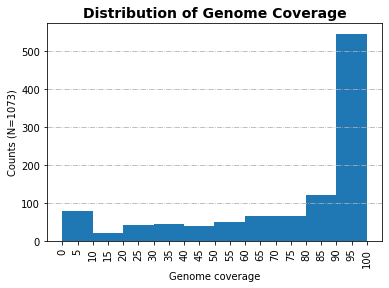

In [152]:
fig,ax = plt.subplots(1,1)
plt.hist(covv_seq_tech['genome_coverage'])
plt.xlabel('Genome coverage')
plt.ylabel(f'Counts (N={covv_seq_tech.shape[0]-1})')
plt.xticks(np.arange(0,105, 5), rotation=90)
# plt.yticks(np.arange(0,375, 25))
plt.grid('major', axis='y', ls='-.')
plt.title('Distribution of Genome Coverage', fontdict)
# ax.hlines(67, 2, 99, colors='orange', linestyles='--')
# plt.annotate('80% coverage threshold', xy=(30, 80))
# fig.savefig(f'/home/douso/SarsGenomics/Processed/report-coverage_{dt}.png')
plt.show()



In [153]:
df_seq_summ.shape

(1074, 6)

In [2]:
df_metadata = pd.read_excel('/home/douso/Documents/TrendData/Results/ResultsMerged/COVID19-results-merged-cln.xlsx')

In [155]:
df_metadata.head()

,S_NUM,AGE_YRS,GEND,OCCU,NAT,COUNT_RES,S_COUNT_RES,TRAV_HIST,TRAV_FROM,QUAR_PLACE,SYMPS,DT_SAM_COLL,DT_SAM_RECEP,RESULT,DT_CONF
0,COVC00001,35.0,F,Refugee,NaN,Garissa,Dadaab,No,NaN,NaN,NaN,NaT,NaT,Negative,2020-06-02
1,COVC00002,29.0,M,Refugee,NaN,Garissa,Dadaab,No,NaN,NaN,NaN,NaT,NaT,Negative,2020-06-02
2,COVC00003,50.0,M,Refugee,NaN,Garissa,Dadaab,No,NaN,NaN,NaN,NaT,NaT,Negative,2020-06-02
3,COVC00004,35.0,F,Casual,NaN,Garissa,Dadaab,No,NaN,NaN,NaN,NaT,NaT,Negative,2020-06-02
4,COVC00005,27.0,F,Refugee,NaN,Garissa,Dadaab,No,NaN,NaN,NaN,NaT,NaT,Negative,2020-06-02


In [156]:
df_metadata_sub = df_metadata[df_metadata['S_NUM'].isin(list(df_seq_summ['sequence_name']))]

In [157]:
df_metadata_sub.shape

(949, 15)

In [158]:
df_metadata_sub.sort_values('DT_CONF').to_excel(f'/home/douso/Documents/TrendData/Results/ResultsMerged/all-sequenced-samples_{dt}.xlsx', index=False)

In [159]:
df_metadata[df_metadata['S_NUM'].str.contains('_')]

,S_NUM,AGE_YRS,GEND,OCCU,NAT,COUNT_RES,S_COUNT_RES,TRAV_HIST,TRAV_FROM,QUAR_PLACE,SYMPS,DT_SAM_COLL,DT_SAM_RECEP,RESULT,DT_CONF
24394,KEMRI_01_89431,44.0,M,NaN,Kenya,Kirinyaga,Mwea,No,NaN,NaN,NaN,2021-01-07,2021-07-30,Positive,2021-01-11
24395,KEMRI_01_89447,28.0,F,NaN,Kenya,Kirinyaga,Kirinyaga east,No,NaN,NaN,NaN,2020-12-24,2021-07-30,Positive,2021-01-11
24396,KEMRI_01_89476,41.0,M,NaN,Kenya,Nairobi,Kasarani,No,NaN,NaN,"sore throat,cough,headache,fever",2021-01-08,2021-07-30,Positive,2021-01-11
24397,KEMRI_01_89487,57.0,M,NaN,Kenya,Kiambu,Githunguri,No,NaN,NaN,NaN,2021-01-07,2021-07-30,Positive,2021-01-11
24398,KEMRI_01_89581,53.0,F,NaN,Kenya,Kajiado,Ngong,No,NaN,NaN,NaN,2021-12-01,2021-07-30,Positive,2021-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24473,KEMRI_02_93645,37.0,F,NaN,Kenya,Kiambu,Githunguri,No,NaN,NaN,"Fever, Cough, Sore throat, Runny nose, Chest p...",2021-02-25,2021-07-30,Positive,2021-02-03
24474,KEMRI_02_93781,46.0,M,NaN,Kenya,Nairobi,Roysambu,No,NaN,NaN,"Cough, Difficulty in breathing",2021-02-26,2021-07-30,Positive,2021-02-03
24475,KEMRI_02_93791,34.0,F,NaN,Kenya,Nairobi,Ruaraka,No,NaN,NaN,"Cough, Sore throat, Confusion, Shortness of br...",2021-01-03,2021-07-30,Positive,2021-02-03
24476,KEMRI_02_93792,45.0,M,NaN,Kenya,Nairobi,Dagoretti south,No,NaN,NaN,NaN,2021-01-03,2021-07-30,Positive,2021-02-03


In [160]:
df_sub = df_seq_summ[df_seq_summ['sequence_name'].isin(list(df_metadata['S_NUM'])) == True]

In [161]:
len(list(df_sub['sequence_name']))

983

In [162]:
usecols=['S_NUM', 'AGE_YRS', 'COUNT_RES', 'DT_CONF']

In [163]:
df_seq_meta = covv_seq_tech.merge(df_metadata[usecols], how='inner', left_on='sequence_name', right_on='S_NUM').drop('S_NUM', axis=1)

In [164]:
df_seq_meta.head()

,sequence_name,clade,lineage,genome_coverage,run_num,seq_dt,covv_seq_tech,AGE_YRS,COUNT_RES,DT_CONF
0,COVC11310,20C,B.1,59.3,Run1,09-02-2021,Illumina,30.0,Garissa,2020-10-03
1,COVC11310,20C,B.1,97.0,Run8,25-05-2021,Illumina,30.0,Garissa,2020-10-03
2,COVC00854,20C,B.1,94.9,Run7,18-05-2021,Illumina,23.0,Nairobi,2020-06-13
3,COVC00867,20C,B.1.446,68.2,Run7,18-05-2021,Illumina,32.0,Nairobi,2020-06-13
4,COVC00893,20C,B.1.446,84.1,Run7,18-05-2021,Illumina,31.0,Nairobi,2020-06-13


In [165]:
df_seq_meta.columns = ['sequence_name', 'clade', 'lineage', 'genome_coverage', 'run_num',
       'seq_dt', 'seq_tech', 'age_yrs', 'county_res', 'dt_conf']

In [166]:
df_seq_meta.head()

,sequence_name,clade,lineage,genome_coverage,run_num,seq_dt,seq_tech,age_yrs,county_res,dt_conf
0,COVC11310,20C,B.1,59.3,Run1,09-02-2021,Illumina,30.0,Garissa,2020-10-03
1,COVC11310,20C,B.1,97.0,Run8,25-05-2021,Illumina,30.0,Garissa,2020-10-03
2,COVC00854,20C,B.1,94.9,Run7,18-05-2021,Illumina,23.0,Nairobi,2020-06-13
3,COVC00867,20C,B.1.446,68.2,Run7,18-05-2021,Illumina,32.0,Nairobi,2020-06-13
4,COVC00893,20C,B.1.446,84.1,Run7,18-05-2021,Illumina,31.0,Nairobi,2020-06-13


In [167]:
df_seq_meta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 0 to 982
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   sequence_name    983 non-null    object        
 1   clade            955 non-null    object        
 2   lineage          983 non-null    object        
 3   genome_coverage  983 non-null    float64       
 4   run_num          983 non-null    object        
 5   seq_dt           983 non-null    object        
 6   seq_tech         983 non-null    object        
 7   age_yrs          901 non-null    float64       
 8   county_res       955 non-null    object        
 9   dt_conf          983 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 84.5+ KB


In [168]:
df_gby_lin = df_seq_meta.groupby('lineage').count()#, as_index=False

In [169]:
clr_code = {'A.23': ('lime', '#00FF00'), 'A.23.1': ('gray', '#808080'), 'A.25': ('orangered', '#FF4500'),
 'B.1': ('cyan', '#00FFFF'), 'B.1.1': ('chocolate', '#D2691E'), 'B.1.1.171': ('teal', '#008080'),
 'B.1.1.406': ('slategray', '#708090'), 'B.1.1.7': ('orange', '#FFA500'), 'B.1.103': ('seagreen', '#2E8B57'),
 'B.1.143': ('olive', '#808000'), 'B.1.160': ('honeydew', '#FFD700'), 'B.1.214': ('gold', '#8FBC8F'),
 'B.1.276': ('aquamarine', '#006400'), 'B.1.302': ('yellowgreen', '#9ACD32'), 'B.1.336': ('tan', '#D2B48C'),
 'B.1.343': ('indigo', '#4B0082'), 'B.1.349': ('mediumpurple', '#9370DB'), 'B.1.351': ('blue', '#0000FF'),
 'B.1.378': ('darkslateblue', '#483D8B'), 'B.1.388': ('sienna', '#A0522D'), 'B.1.390': ('darkkhaki', '#BDB76B'),
 'B.1.429': ('khaki', '#F0E68C'), 'B.1.433': ('dodgerblue', '#1E90FF'), 'B.1.446': ('palevioletred', '#DB7093'),
 'B.1.517': ('yellow', '#FFFF00'), 'B.1.520': ('floralwhite', '#6495ED'), 'B.1.525': ('green', '#008000'),
 'B.1.530': ('red', '#AFEEEE'), 'B.1.535': ('purple', '#800080'), 'B.1.549': ('brown', '#A52A2A'),
 'B.1.551': ('chocolate', '#D2691E'), 'B.1.596': ('steelblue', '#4682B4'), 'B.1.596.1': ('magenta', '#FF00FF'),
 'B.1.605': ('rosybrown', '#BC8F8F'), 'B.1.612': ('goldenrod', '#DAA520'), 'B.1.617.2': ('paleturquoise', '#FF0000'),
 'TBA10': ('lavender', '#E6E6FA'),
'TBA12': ('pink', '#FFC0CB'),
'TBA14': ('seashell', '#FFFAF0'),
'TBA16': ('mediumvioletred', '#C71585'),
'TBA18': ('black', '#000000'),
'TBA2': ('cornflowerblue', '#FFF5EE'),
'TBA20': ('saddlebrown', '#8B4513'),
'TBA21': ('wheat', '#F5DEB3'),
'TBA22': ('slategray', '#708090'),
'TBA23': ('silver', '#C0C0C0'),
'TBA4': ('midnightblue', '#191970'),
'TBA6': ('darkgreen', '#7FFFD4'),
'TBA8': ('darkseagreen', '#F0FFF0'),
'c': ('cyan', 'c'),
'm': ('magenta', 'm'),
'k': ('black', 'k')}
avail_clr = ['TBA2', 'TBA4', 'TBA6', 'TBA8', 'TBA10', 'TBA12', 'TBA14', 'TBA16', 'TBA18', 'TBA20', 'TBA21',
 'TBA22', 'TBA23', 'c', 'm', 'k']

In [170]:
clr_code_keys = list(clr_code.keys())

In [171]:
lins = df_gby_lin.sequence_name.sort_values(ascending=False)#.index
# lins

In [172]:
lin_to_be_assinged =  set(lins.index) - set(clr_code_keys)
# lin_to_be_assinged

In [173]:
import pprint
for lin, clr in zip(lin_to_be_assinged, avail_clr):
#     print(lin, clr)
    clr_code[lin] = clr_code.pop(clr)
    avail_clr.remove(clr)

In [174]:
# pprint.pprint(clr_code)
pprint.pprint(avail_clr)

['TBA4', 'TBA8', 'TBA12', 'TBA16', 'TBA20', 'TBA22', 'c', 'k']


In [175]:
def replace_with_who_lin(x):
    if x == 'B.1.1.7':
        return x.replace(x, 'B.1.1.7(Alpha)')
    if x == 'B.1.617.2':
        return x.replace(x, 'B.1.617.2(Delta)')
    if x == 'B.1.351':
        return x.replace(x, 'B.1.351(Beta)')
    if x == 'B.1.525':
        return x.replace(x, 'B.1.525(Eta)')
    return x
    

In [176]:
ylabels = list(map(replace_with_who_lin,list(lins.index)))

In [177]:
lins.index=ylabels

In [178]:
lins.values.sum()

983

In [179]:
max_count = lins.max()
max_count

292

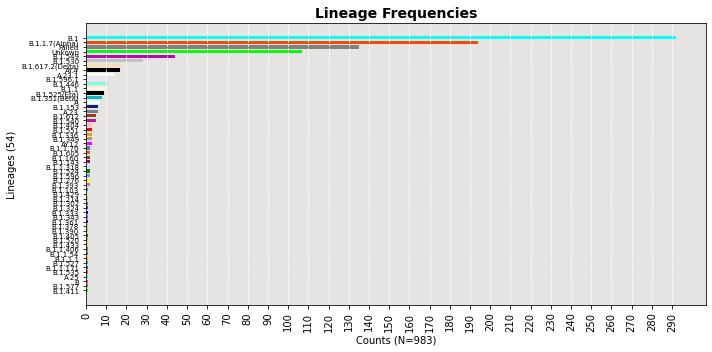

In [212]:
import math
width = lins.sort_values(ascending=True)

# colors = [clr_code[lin.split('(')[0]][1] for lin in width.index]
colors = [clr_code[lin][1] for lin in clr_code.keys()]
n = len(lins) - 2
m = sum(lins)
xticks = np.arange(0, (math.ceil(max_count / 5) + 1) * 5, 10)
fig, ax =plt.subplots(1, 1, figsize=(10,5))
ax.set_facecolor("#E5E4E2")##E5E4E2

plt.barh(width.index, width, height=0.7, log=False, color=colors)#, logy=True
plt.xticks(xticks, xticks, rotation=90)
plt.yticks(width.index, fontsize=7)
plt.grid(which='major', axis='x', ls='--', color='w')
plt.ylabel(f'Lineages ({n})')
plt.xlabel(f'Counts (N={m})')
plt.title('Lineage Frequencies', fontdict)
plt.tight_layout()
# fig.savefig(f'/home/douso/SarsGenomics/Processed/report-lineages_{dt}600.png', dpi=600.0)
plt.show()

In [49]:
df_metadata.shape[0]-153

24378

In [50]:
df_1 = df_metadata[df_metadata['S_NUM'].str.contains('COV') == False]#.shape#.\
# to_excel('/home/douso/Downloads/fjjsfbfdbfb.xlsx')

In [51]:
df_2 = df_metadata[df_metadata['S_NUM'].str.contains('COVC') == False]#.shape#.\
# to_excel('/home/douso/Downloads/fjjsfbfdbfb.xlsx')

In [52]:
set(df_2['S_NUM']) - set(df_1['S_NUM'])

{'COVE20',
 'COVE21',
 'MOH-COV-1',
 'MOH-COV-2',
 'MOH-COV-3',
 'MOH-COV-4',
 'MOH-COV-5',
 'MOH-COV-6'}

In [53]:
df_covs = df_metadata[df_metadata['S_NUM'].str.contains('COV') == True]#.shape

In [54]:
df_covs.head()#shape

,S_NUM,AGE_YRS,GEND,OCCU,NAT,COUNT_RES,S_COUNT_RES,TRAV_HIST,TRAV_FROM,QUAR_PLACE,SYMPS,DT_SAM_COLL,DT_SAM_RECEP,RESULT,DT_CONF
0,COVC00001,35.0,F,Refugee,NaN,Garissa,Dadaab,No,NaN,NaN,NaN,NaT,NaT,Negative,2020-06-02
1,COVC00002,29.0,M,Refugee,NaN,Garissa,Dadaab,No,NaN,NaN,NaN,NaT,NaT,Negative,2020-06-02
2,COVC00003,50.0,M,Refugee,NaN,Garissa,Dadaab,No,NaN,NaN,NaN,NaT,NaT,Negative,2020-06-02
3,COVC00004,35.0,F,Casual,NaN,Garissa,Dadaab,No,NaN,NaN,NaN,NaT,NaT,Negative,2020-06-02
4,COVC00005,27.0,F,Refugee,NaN,Garissa,Dadaab,No,NaN,NaN,NaN,NaT,NaT,Negative,2020-06-02


In [55]:
df_covs['RESULT'].value_counts(dropna=False)

Negative    20726
Positive     3487
ms              7
Name: RESULT, dtype: int64

In [56]:
df_covs.shape

(24220, 15)

In [57]:
top10 = df_covs['COUNT_RES'].value_counts()[:10]

In [58]:
df_pos_count = df_covs.groupby(['COUNT_RES', 'RESULT']).count().T[list(top10.index)].loc['S_NUM']#.sort_values('S_NUM', ascending=False)
df_pos_count

COUNT_RES  RESULT  
Nairobi    Negative    8016
           Positive     976
           ms             5
Kiambu     Negative    4132
           Positive    1324
           ms             1
Mombasa    Negative    3642
           Positive     499
Nakuru     Negative     937
           Positive     238
Laikipia   Negative     942
           Positive     112
Nyeri      Negative     672
           Positive      41
           ms             1
Garissa    Negative     623
           Positive      54
Kajiado    Negative     480
           Positive      48
Machakos   Negative     271
           Positive      15
Murang'a   Negative     213
           Positive      34
Name: S_NUM, dtype: int64

<AxesSubplot:xlabel='COUNT_RES,RESULT'>

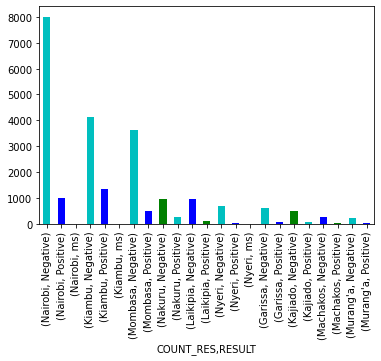

In [59]:
df_pos_count.plot.bar(color=['c', 'b', 'g'], stacked=True)


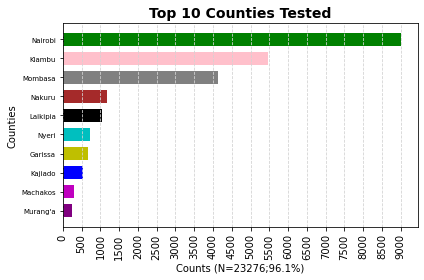

In [60]:
import math
width = df_covs['COUNT_RES'].value_counts()[:10].sort_values(ascending=True)

max_count = max(width)
# colors = [clr_code[lin.split('(')[0]][1] for lin in width.index]
# n = len(lins) - 2
m = sum(width)
n = df_covs.shape[0]
xticks = np.arange(0, (math.ceil(max_count / 500) + 1) * 500, 500)
fig, ax =plt.subplots()
# ax.set_facecolor("#E5E4E2")##E5E4E2

plt.barh(width.index, width, height=0.7, color=['purple', 'm', 'b',
                                                'y', 'c', 'k',
                                                'brown', 'gray',
                                               'pink', 'g'])#, logy=True
plt.xticks(xticks, xticks, rotation=90)
plt.yticks(width.index, fontsize=7)
plt.grid(which='major', axis='x', ls='--', color='lightgray')
plt.ylabel('Counties')
plt.xlabel(f'Counts (N={m};{round(m/n*100, 1)}%)')
plt.title('Top 10 Counties Tested', fontdict)
plt.tight_layout()
# fig.savefig(f'/home/douso/SarsGenomics/Processed/report-top10Counties_{dt}.png')
plt.show()

In [61]:
df_covs['RESULT'].value_counts(dropna=True)#[2]

Negative    20726
Positive     3487
ms              7
Name: RESULT, dtype: int64

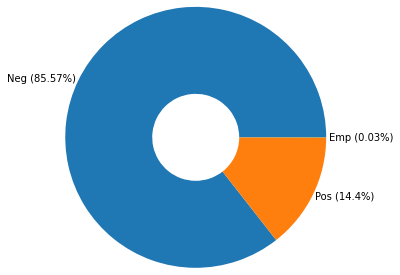

In [208]:
fig,ax = plt.subplots()

data = df_covs['RESULT'].value_counts()[:3]
pct = (np.array(data)/np.array(data).sum()*100).round(2)
plt.pie(data, wedgeprops=dict(width=1), labels=[f'Neg ({pct[0]}%)', 
                      f'Pos ({pct[1]}%)', 
                      f'Emp ({pct[2]}%)'], labeldistance=1.02, radius=1.5)
# ax.set_title('Proportions for Test Outcome', fontdict, pad=1.1)
# fig.savefig(f'/home/douso/SarsGenomics/Processed/report-results_{dt}.png')
plt.show()

In [63]:
df_ts = df_seq_meta.set_index('dt_conf').sort_index()

In [201]:
df_ts.head(30)

,sequence_name,clade,lineage,genome_coverage,run_num,seq_dt,seq_tech,age_yrs,county_res
dt_conf,,,,,,,,,
2020-06-13,COVC00854,20C,B.1,94.9,Run7,18-05-2021,Illumina,23.0,Nairobi
2020-06-13,COVC00867,20C,B.1.446,68.2,Run7,18-05-2021,Illumina,32.0,Nairobi
2020-06-13,COVC00893,20C,B.1.446,84.1,Run7,18-05-2021,Illumina,31.0,Nairobi
2020-06-13,COVC00915,NaN,Failed,0.0,Run7,18-05-2021,Illumina,22.0,Nairobi
2020-06-14,COVC00998,20C,B.1,94.0,Run7,18-05-2021,Illumina,25.0,Nairobi
2020-06-14,COVC00962,20A,B.1,92.9,Run7,18-05-2021,Illumina,31.0,Nairobi
2020-06-14,COVC00987,20C,B.1.446,80.7,Run7,18-05-2021,Illumina,32.0,Nairobi
2020-06-14,COVC00996,20A,B.1,53.0,Run7,18-05-2021,Illumina,29.0,Nairobi
2020-06-15,COVC01116,20C,B.1,96.5,Run7,18-05-2021,Illumina,30.0,Nairobi


In [127]:
index = df_ts['lineage'].resample('M', closed='right').count().index

In [197]:
index1 = df_ts['lineage'].resample('W', closed='right').count()#.max()

In [128]:
ticks = [dt.value for dt in index]

In [185]:
ticks1 = [dt.value for dt in index1]

In [198]:
index1

dt_conf
2020-06-14     8
2020-06-21     8
2020-06-28    46
2020-07-05     1
2020-07-12     4
              ..
2021-07-11    20
2021-07-18     6
2021-07-25    10
2021-08-01     3
2021-08-08     4
Freq: W-SUN, Name: lineage, Length: 61, dtype: int64

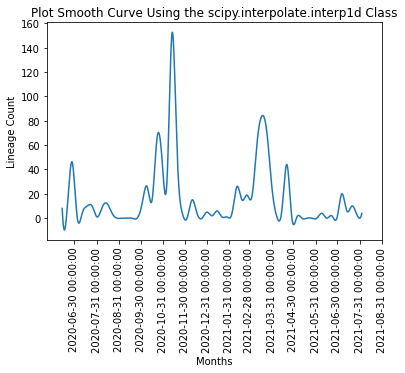

In [195]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
 
# Dataset
n=df_ts.shape[0]
x=np.arange(n)
y=np.array(df_ts['lineage'].resample('W', closed='right').count())

start = pd.Timestamp(df_ts.index[0])
end = pd.Timestamp(df_ts.index[-1])

t = np.linspace(start.value, end.value, len(y))

cubic_interploation_model = interp1d(t, y, kind = "cubic")
 
# Plotting the Graph
X_=np.linspace(t.min(), t.max(), 5000)
Y_=cubic_interploation_model(X_)

fig,ax = plt.subplots()

plt.plot(X_, Y_)
plt.title("Plot Smooth Curve Using the scipy.interpolate.interp1d Class")
ax.xaxis.set_major_locator(MultipleLocator(20))
ax.xaxis.set_minor_locator(MultipleLocator(4))
plt.xticks(ticks, labels=index, rotation=90)
plt.xlabel("Months")
plt.ylabel("Lineage Count")
plt.show()

In [68]:
start = pd.Timestamp(df_ts.index[0])
end = pd.Timestamp(df_ts.index[-1])

In [77]:
X_

array([1.59200640e+18, 1.59201359e+18, 1.59202078e+18, ...,
       1.62793442e+18, 1.62794161e+18, 1.62794880e+18])

In [70]:
print(start.value, end)

1592006400000000000 2021-08-03 00:00:00


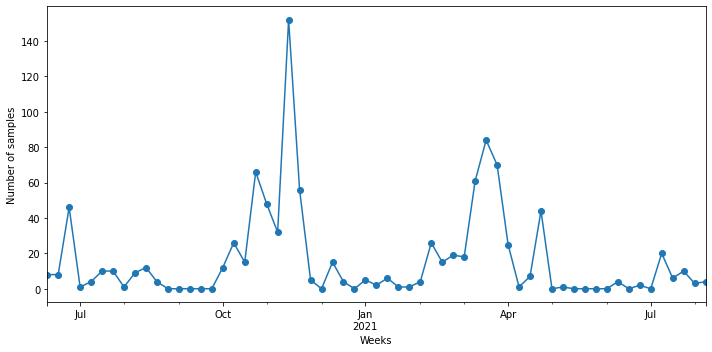

In [65]:
import numpy as np
from scipy.interpolate import interp1d

fig, ax = plt.subplots(figsize=(10, 5))

tests = df_ts['lineage'].resample('W').count()
# pos = df_tseries0['RESULT'].resample('W').count()
# neg = df_tseries1['RESULT'].resample('W').count()

tests.plot(ax=ax, marker='o', linestyle='-', label='tests')
# neg.plot(ax=ax, marker='o', linestyle='-', label='negaives')
# pos.plot(ax=ax, marker='o', linestyle='-', label='positives')

plt.xlabel('Weeks')
plt.ylabel('Number of samples')
# plt.legend()
plt.tight_layout()
# fig.savefig(f'/home/douso/Documents/TrendData/plots/draft_cov_trends_plot-line_{dt}.png')
plt.show()

In [66]:
tests[-1]

4

In [1]:
plt.style.available

NameError: name 'plt' is not defined

In [ ]:
# %matplotlib widget
fig, ax = plt.subplots(figsize=(10, 5))

tests = df_tseries['RESULT'].resample('W').count()
pos = df_tseries0['RESULT'].resample('W').count()
neg = df_tseries1['RESULT'].resample('W').count()

prop_pos = pos / tests * 100
prop_neg = neg / tests * 100

prop_pos.plot(ax=ax, marker='o', linestyle='-', label='positives', color='orange')
# prop_neg.plot(ax=ax, marker='o', linestyle='-', label='negatives', color='green')
# ax.plot(neg, style="-o", label='positives')
# ax.plot(pos, style="-o", label='negaives')

#plt.ioff()
plt.xlabel('Weeks')
plt.ylabel('% Proportions')
plt.legend()
plt.xticks()
plt.grid(axis='y', ls='--')
plt.show()
plt.tight_layout()
# fig.savefig(f'/home/douso/Documents/TrendData/plots/draft_cov-pro+_trends_plot-line_{dt}.png')

In [ ]:
index = np.array(pos.index)

In [ ]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
 
# Dataset
x=np.arange(46)
y=np.array(list(prop_pos)[:-1])

start = pd.Timestamp(index[0])
end = pd.Timestamp(index[-1])

t = np.linspace(start.value, end.value, 23)

cubic_interploation_model = interp1d(t, y, kind = "cubic")
 
# Plotting the Graph
X_=np.linspace(t.min(), t.max(), 5000)
Y_=cubic_interploation_model(X_)
 
plt.plot(X_, Y_)
plt.title("Plot Smooth Curve Using the scipy.interpolate.interp1d Class")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [ ]:
x = np.arange(len(df_tseries0['RESULT'].resample('W').count()))
width = 0.3

fig, ax = plt.subplots(figsize=(20, 5))

tests = df_tseries['RESULT'].resample('W').count()[:-1]
pos = df_tseries0['RESULT'].resample('W').count()
neg = df_tseries1['RESULT'].resample('W').count()[:-1]
print(len(tests), len(pos), len(neg))

# xticks = [i.strftime(format='%d-%m-%y') for i in tests.index]

rec1 = ax.bar(x - width/2, tests, width=width, color='darkblue', label='tests', align='center')
rec2 = ax.bar(x + width/2, neg, width=width, color='green', label='negatives', align='center')
rec3 = ax.bar(x + width*3/2, pos, width=width, color='orange', label='positives', align='center')

plt.xlabel('Weeks')
plt.xticks(rotation=90)
plt.ylabel('Number of samples')
plt.legend()
plt.show()
plt.tight_layout()
# fig.savefig(f'/home/douso/Documents/TrendData/plots/draft_cov_trends_plot-bar_{dt}.png')

In [ ]:
x = np.arange(len(df_tseries0['RESULT'].resample('W').count()))
width = 0.5

fig, ax = plt.subplots(figsize=(20, 5))

tests = df_tseries['RESULT'].resample('W').count()[:-1]
pos = df_tseries0['RESULT'].resample('W').count()
neg = df_tseries1['RESULT'].resample('W').count()[:-1]
print(len(tests), len(pos), len(neg))

xticks = [i.strftime(format='%d-%m-%y') for i in tests.index]

ax.bar(x, pos, width=width, color='orange', label='positives', align='center')
ax.bar(x, neg, width=width, color='green', bottom=pos, label='negatives', align='center')
#ax.bar(x, tests, width=width, color='darkblue', bottom=neg, label='tests', align='center')

ax.set_xticklabels(xticks)
plt.xlabel('Weeks')
plt.xticks()
plt.ylabel('Number of samples')
plt.legend()
plt.show()
plt.tight_layout()
# fig.savefig(f'/home/douso/Documents/TrendData/plots/draft_cov_trends_plot-stacked_{dt}.png')

In [ ]:
g = df_tseries.groupby(pd.Grouper(freq='D'))['RESULT'].value_counts().plot(figsize=(10, 5))
plt.xticks(rotation=90)

In [ ]:
g

### Lineages trend

In [ ]:
df1 = (pd.read_table('/home/douso/Insync/D.Ouso@cgiar.org/OneDrive Biz/\
sequencing_metadata/processed/seq-metadata-SM001.csv', parse_dates=True)
       [['Sequence_name', 'Lineage', 'Lab_confirmation_date']])

In [ ]:
df2 = (pd.read_table('/home/douso/Insync/D.Ouso@cgiar.org/OneDrive Biz/\
sequencing_metadata/processed/seq-metadata0-SM002.tsv')
[['Sequence_name','Lineage', 'Lab_confirmation_date']])

In [ ]:
dff1 = (df1.assign(Lab_confirmation_date = df1['Lab_confirmation_date']
                               .apply(lambda x: pd.Timestamp(x))))

In [ ]:
dff2 = (df2.assign(Lab_confirmation_date = df2['Lab_confirmation_date']
                               .apply(lambda x: pd.Timestamp(x))))

In [ ]:
dff2

In [ ]:
dff1

In [ ]:
df_lin = dff1.append(dff2, ignore_index=True, verify_integrity=True)

In [ ]:
df_lin_cln = df_lin[df_lin['Lab_confirmation_date'].notna()]

In [ ]:
df_lin

In [ ]:
df_lin_ts = (df_lin.sort_values('Lab_confirmation_date'))
#              .groupby('Lineage'))
#              .set_index('Lineage'))


In [ ]:
df_lin_ts['Sequence_name'].nunique()

In [ ]:
df_lin_ts2 = df_lin_ts[df_lin_ts['Lab_confirmation_date'] != '2021-09-02']

In [ ]:
df_lin_ts2['Sequence_name'].nunique()

In [ ]:
df_lin_grpby_lb_l = df_lin_ts2.groupby(['Lab_confirmation_date', 'Lineage']).count()

In [ ]:
ticks

In [ ]:
df_lin_grpby_lb_l

In [ ]:
ticks = [tup[0] for tup in df_lin_grpby_lb_l.index.to_list()]
labels = [','.join([tup[0].strftime(format='%b-%m'), tup[1]]) for tup in df_lin_grpby_lb_l.index.to_list()]

In [ ]:
df_lin_grpby_lb_l.plot(label='Lineages', color='green')
# ax.set_xticks(ticks)
# xtics = plt.xticks()
plt.xticks(np.arange(len(ticks)), labels=labels, rotation=90)
plt.xlabel('Test dates, Lineages')
plt.legend(['Lineages'])
fontdict = {'fontsize': 14,
        'fontweight': 3,
        'color': 'k'}
plt.title('Lineage frequencies across time', fontdict=fontdict)
plt.ylabel('Lineage counts')
plt.grid(axis='y', ls='--')
plt.tight_layout()
plt.savefig('/home/douso/Documents/TrendData/plots/trend-analysis2-P002.png', dpi=500)
# plt.xticks(ticks=t, labels=l, rotation=90)

In [ ]:
print(len(np.array(df_lin_grpby_lb_l['Sequence_name'])))
print(np.array(df_lin_grpby_lb_l['Sequence_name']))
print(len(np.linspace(start.value, end.value, 31)))
print(np.array(pd.to_datetime(np.linspace(start.value, end.value, 31))))
print(len(x))
print(x)
print(ticks[0], ticks[-1])
print(t[0], t[-1])

In [ ]:
len(np.array(df_lin_grpby_lb_l['Sequence_name']))

In [ ]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# Dataset
x=np.arange(len(ticks))
y=np.array(df_lin_grpby_lb_l['Sequence_name'])

start = ticks[0]
end = ticks[-1]

t = np.linspace(start.value, end.value, 31)

cubic_interploation_model = interp1d(t, y, kind = "cubic")
 
# Plotting the Graph
X_=np.linspace(t.min(), t.max(), 1000)
Y_=cubic_interploation_model(X_)
 

plt.plot(X_, Y_, label='Lineages', color='green')
plt.xticks(t, labels=labels, rotation=90)
plt.xlabel('Test dates, Lineages')
plt.legend(['Lineages'])
plt.ylabel('Lineage counts')
fontdict = {'fontsize': 14,
        'fontweight': 3,
        'color': 'k'}
plt.title('Lineage frequencies across time', fontdict=fontdict)
plt.grid(axis='y', ls='--')
plt.tight_layout()
plt.savefig('/home/douso/Documents/TrendData/plots/trend-analysis-smooth-P002.png', dpi=500)
plt.show()


In [ ]:
df_lin_grpby2 = df_lin_ts2.groupby('Lineage').count()
df_lin_grpby2

In [ ]:
df_lin_grpby.resample('Lineage', 'W').count()